In [1]:
%matplotlib inline
import numpy as np
#from parsimonia_LS import *
import matplotlib.pyplot as plt
from scipy.linalg import hankel
from testBartlett_wn import *
#%pylab --no-import-all 

In [2]:
y = np.loadtxt('serie_storica_per_ESE.dat') 

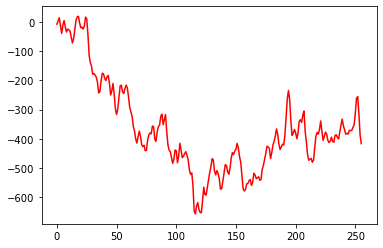

In [3]:
plt.figure(3); plt.plot(y,'r-');

In [4]:
def parsimonia_LS(n,b,maxgp,stderr=0.0):  # "A": matrice del modello lineare
  vk = np.arange(0.,n)  
  Ai = np.vander(vk) #le colonne sono vk**(numero di colonna) partendo da quella più a destra che è x_r**0
                        #nel nostro caso se siamo nella riga r, colonna c abbiamo il termine x_r**(n-c)
  n2res = np.zeros(maxgp+1)
  estvar_errpred = np.zeros(maxgp+1)
  estvar_parest = np.zeros((maxgp+1,maxgp+1))
  for gradopol in range(maxgp+1):
    A = Ai[:,range(n-(gradopol+1),n)]; #i nostri estimated y sono le colonne dalla ultima alla (gradopol+1)_penultima 
                                       #dobbiamo associare i coefficenti a queste colonne 
                                       # A dovrebbe avere gradopol+1 colonne
    #print(gradopol,A.shape)
    Qh,Rh = np.linalg.qr(A.copy())
    x = np.linalg.solve( Rh , Qh.T@b ) #LS solution con QR
    stima = A@x
    if gradopol == 0:
        trend = stima
    trend = np.hstack((trend,stima))
    n2res[gradopol] = np.linalg.norm(stima - b, 2) #norma due del residuo
    mmn = A.shape[0] - A.shape[1] 
    if mmn>0:   #mmn è positivo quando il numero di righe è maggiore delle colonne quindi va bene usare least-squares
      estvar_errpred[gradopol] = n2res[gradopol]**2 / mmn #trovi la def in parsimonia (9.1.2.1)
    #endif
    covd = np.diag(estvar_errpred[gradopol]*(np.linalg.inv(A.T@A))) #la varianza delle stime dei parametri è sigma^2*(AtA)^-1
    estvar_parest[gradopol,0:gradopol+1] = covd
    
    plt.figure(10+gradopol); plt.plot(vk,b,'bo'); plt.plot(vk,A@x,'mo'); plt.title('grado = '+str(gradopol)); plt.show()
    B = np.concatenate((A, b), axis=1)
    
    U,S,V = np.linalg.svd(B)
    print("parametri stimati: ", x.T)
    print("radice della varianza delle stime dei parametri: ", np.sqrt(covd))
    print("varianza delle stime dei parametri: ", covd)
    print("valori singolari di [A b]: ",S) #PERCHè DI [A|b]???
  #endfor
  plt.figure(40); plt.plot(n2res); plt.title('norma-2 del residuo')
  plt.figure(50); plt.plot(estvar_errpred,'b-'); plt.plot(np.array([0., maxgp]),np.array([stderr**2, stderr**2]),'r-'); plt.title('varianza rumore di misura (rosso) e stima (blu)');
  return trend

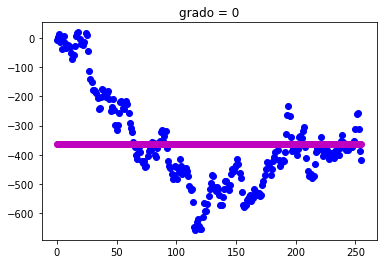

parametri stimati:  [[-363.45272875]]
radice della varianza delle stime dei parametri:  [10.04792258]
varianza delle stime dei parametri:  [100.96074811]
valori singolari di [A b]:  [6356.72798753    6.46178803]


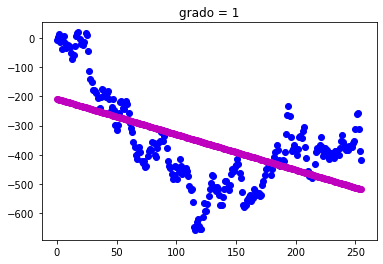

parametri stimati:  [[  -1.21680078 -208.31062967]]
radice della varianza delle stime dei parametri:  [ 0.11282898 16.62744772]
varianza delle stime dei parametri:  [1.27303795e-02 2.76472018e+02]
valori singolari di [A b]:  [6.71307089e+03 9.49922068e+02 6.30783507e+00]


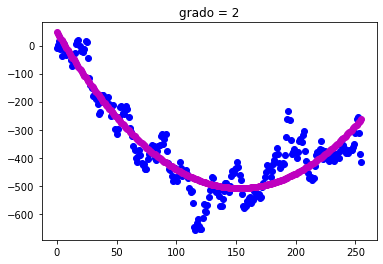

parametri stimati:  [[ 2.37108041e-02 -7.26305582e+00  4.76475005e+01]]
radice della varianza delle stime dei parametri:  [8.38632697e-04 2.20918520e-01 1.21937148e+01]
varianza delle stime dei parametri:  [7.03304801e-07 4.88049927e-02 1.48686680e+02]
valori singolari di [A b]:  [4.66679918e+05 4.02882181e+03 1.57100239e+02 5.21841021e+00]


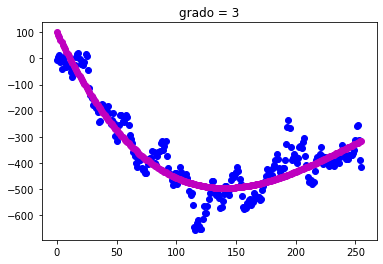

parametri stimati:  [[-6.45981468e-05  4.84195952e-02 -9.77842368e+00  1.00575378e+02]]
radice della varianza delle stime dei parametri:  [1.22907256e-05 4.76840081e-03 5.22686900e-01 1.53603536e+01]
varianza delle stime dei parametri:  [1.51061937e-10 2.27376463e-05 2.73201596e-01 2.35940462e+02]
valori singolari di [A b]:  [1.00766889e+08 7.78944296e+04 1.94001554e+03 1.30008315e+02
 3.74920541e+00]


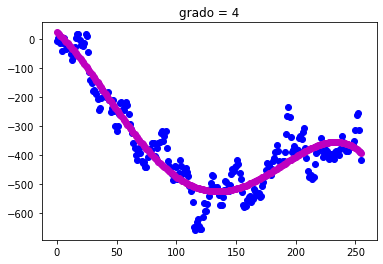

parametri stimati:  [[-1.28849340e-06  5.92533489e-04 -5.91631615e-02 -3.70981302e+00
   2.45639107e+01]]
radice della varianza delle stime dei parametri:  [1.72751947e-07 8.88052552e-05 1.50577606e-02 9.41556982e-01
 1.72557781e+01]
varianza delle stime dei parametri:  [2.98432353e-14 7.88637336e-09 2.26736153e-04 8.86529550e-01
 2.97761879e+02]
valori singolari di [A b]:  [2.27055510e+10 1.25957880e+07 2.24038295e+04 9.41213640e+02
 1.11803223e+02 3.25842302e+00]


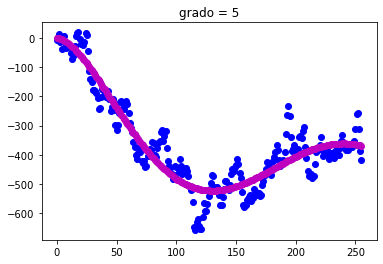

parametri stimati:  [[ 5.54237219e-09 -4.82175567e-06  1.39263034e-03 -1.35449827e-01
  -9.52408600e-01  1.76763892e+00]]
radice della varianza delle stime dei parametri:  [2.66867590e-09 1.70991552e-06 3.95223017e-04 3.96616714e-02
 1.62412206e+00 2.03559876e+01]
varianza delle stime dei parametri:  [7.12183108e-18 2.92381110e-12 1.56201233e-07 1.57304818e-03
 2.63777247e+00 4.14366230e+02]
valori singolari di [A b]:  [5.24737874e+12 2.27047727e+09 2.79910313e+06 8.44757332e+03
 8.77702294e+02 6.73563976e+01 2.75181567e+00]


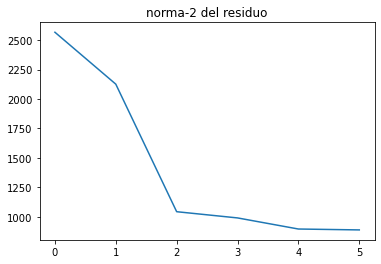

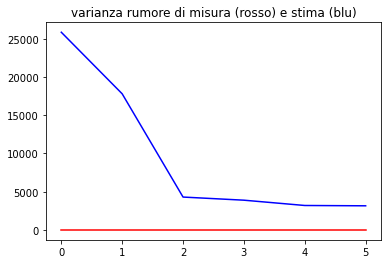

In [5]:
N = len(y)
maxgp = 5
b = np.atleast_2d( y ).T
trend = parsimonia_LS(N,b,maxgp,0.0)

poichè per gradopol=4 l'ultimo coefficente stimato ha una varianza che quasi coincide con il parametro stesso stimo il grado del polinomio essere 3

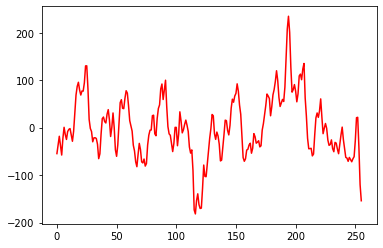

In [6]:
trend = trend[:,3]
# elimino il trend
yflutt =  y - trend
plt.figure(21); plt.plot(yflutt,'r-');

In [7]:
print(hankel([1,2,3,4,5],[5,6,7]))

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]


a_est =  [ 1.         -0.93274256]
a_est =  [ 1.         -1.38870098  0.49694045]
a_est =  [ 1.         -1.58049709  1.04496349 -0.39900773]
a_est =  [ 1.         -1.687685    1.3219543  -0.82854806  0.27797623]
a_est =  [ 1.         -1.70016824  1.35127553 -0.87303527  0.3452241  -0.045005  ]
a_est =  [ 1.         -1.70248     1.3504813  -0.85978828  0.32090933 -0.01471534
 -0.0172262 ]
a_est =  [ 1.         -1.70126395  1.34653389 -0.86212176  0.33998875 -0.04833704
  0.02574052 -0.02511071]
a_est =  [ 1.         -1.70070354  1.34561452 -0.85954058  0.32541337 -0.01571899
 -0.0216633   0.03615006 -0.03735219]
a_est =  [ 1.         -1.69950641  1.34322677 -0.85811177  0.32861438 -0.02946753
  0.00252713  0.00420436  0.00429243 -0.02609334]


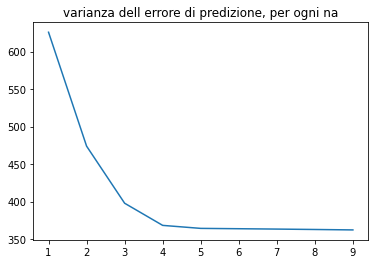

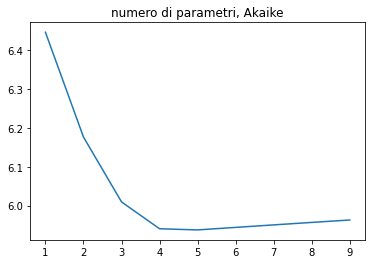

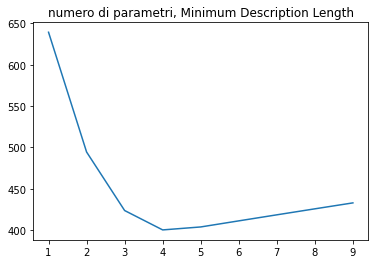

abbiamo ottenuto n_a, con Akaike e MDL 5 e 4 rispettivamente.


In [8]:
max_na = 10
AIC = []
MDL = []
var_pe = np.zeros(max_na-1)
for na_est in range(1,max_na):
    A = hankel(yflutt[1:N-na_est], yflutt[N-na_est-1:N-1])
    _,S,_ = np.linalg.svd(A.copy());
    #plt.semilogy(S,'ro'); plt.title('na_est = ' + str(na_est)); plt.show() #visto che le sing. values dicono poco ho commentato
    d = np.atleast_2d( -yflutt[na_est+1:N] ).T
    Q,R = np.linalg.qr(A.copy())
    a_est = np.ones((na_est+1,1))
    a_est[0:na_est] = np.linalg.solve( R , Q.T@d )
    a_est = np.squeeze(a_est[::-1])
    #print('a_est = ', a_est.T)
    #print("S = ",S)
    pe = np.zeros(N)
    y_est = np.zeros(N)
    for i in range(na_est+1,N): #assenza di ingresso deterministico: y_K + a1*y_k-1 + ... + a_na*y_k-na = eps
        #print('yflutt= ',yflutt[i-1:i-na_est-1:-1])
        y_est[i] = np.sum( -a_est[1:na_est+1]*yflutt[i-1:i-na_est-1:-1] ) #predittore ad un passo: al tempo k conosciamo le vere uscite fino a k-1
        pe[i] = yflutt[i] - y_est[i]
    
    #plt.plot(y,'r-'); plt.plot(y_est+trend,'b--'); plt.show()
    #plt.figure(); plt.plot(pe); plt.show()
    
    if na_est == 4:    #DA CAMBIARE QUI QUANDO TROVI na SODDISFACENTE !!!!!!!
        saved_pe = pe
    var_pe[na_est-1] = np.var(pe)
    V = 1/N * np.linalg.norm(pe)**2
    AIC.append(np.log(V)+na_est*2/N)
    MDL.append(V*(1+na_est*np.log(N)/N))

plt.plot(range(1,max_na),var_pe); plt.title('varianza dell errore di predizione, per ogni na'); plt.show()
na_aic = np.argmin(AIC)+1
plt.plot(range(1,max_na),AIC); plt.title('numero di parametri, Akaike'); plt.show()
na_mdl = np.argmin(MDL)+1
plt.plot(range(1,max_na),MDL); plt.title('numero di parametri, Minimum Description Length'); plt.show()
print('abbiamo ottenuto n_a, con Akaike e MDL',na_aic,'e',na_mdl,'rispettivamente.')

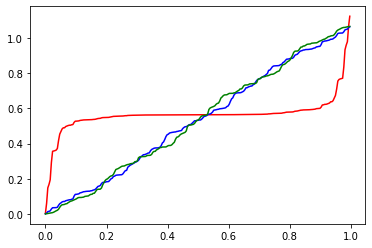

In [9]:
# vediamo se ho "sbiancato" la serie; applico il periodogramma cumulato di Bartlett ad "yflutt" ed a "saved_pe" :
CP_yf,f = testBartlett_wn(yflutt)
plt.plot(f, CP_yf, 'r-');                        # yflutt ROSSO
CP_pe,f = testBartlett_wn(saved_pe)              
plt.plot(f, CP_pe, 'b-')                         # pe BLU

var_s = 10
wn = np.sqrt(var_s) * np.random.randn(N)
CP_wn,f = testBartlett_wn(wn)
plt.plot(f, CP_wn, 'g-');                        # vero rumore bianco VERDE
plt.show()